PUNTO 1 Y 2

In [106]:
#Aquí se agregan todas las librerias necesarias para la ejecucion del programa

from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io
import math
import cv2
import random

In [107]:
#Aquí se lee la imagen
data1 = image.imread('grupo_lab1.jpeg')/255

#Aquí se definen los filtros a usar para detectar las lineas 
#horizontales, verticales, y diagonales respectivamente

kernel_length = np.array(data1).shape[1]//140
kernel_hori = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
kernel_vert = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
kernel_diag= [ [0,1,2],[ -1,0,1],[-2,-1,0]    ]


kernel_diag2=[ [1,1,0 ], [1,0,-1],[0,-1,-1]]
kernel_diag3= [ [0,1,1],[-1,0,1],[-1,-1,0]]

kernel_hori2= [ [-1,-1,-1] , [0,0,0] ,[1,1,1]  ]
kernel_hori3= [[1,0,-1] ,[2,0,-2],[1,0,-1]]

kernel_vert2= [ [ -1,0,1] , [-1,0,1] , [-1,0,1]]
kernel_vert3= [  [1,2,1], [0,0,0], [-1,-2,-1]]

In [ ]:
#Aquí se visualiza información de la matriz  de la imagen, 
#además, se visualiza la imagen
print(data1.dtype)
print(data1.shape)
plt.imshow(data1)
plt.show()

In [ ]:
#Esta función rectifica los datos de una matriz, 
#se usará dentro la función de convolución, de forma
#que retorne valores ya convolucionados con el filtro
# y rectificados
def RLU(features_map, rectified_map):
    #Se recorre la matriz y se asigna 0 a los valores menores a 0
    #y se mantienen los valores positivos
    for r1 in range(len(features_map)):
        for r2 in range(len(features_map[0])):
            if features_map[r1][r2]<=0:
                rectified_map[r1][r2]=0
            else:
                rectified_map[r1][r2]=features_map[r1][r2]
    #se muestra la imagen rectificada
    plt.imshow(rectified_map)
    plt.show()

In [108]:
#Esta función convoluciona una matriz de una imagen con un filtro
def conv3d(kernel_diag1, data1):
    #se determinan las medidas de la matriz
    t_ancho1=len(data1)
    t_alto1=len(data1[0])
    #se define las distancias del centro del kernel a los extremos
    ancho_kernel=math.floor(len(kernel_diag1)/2)
    largo_kernel=math.floor(len(kernel_diag1[0])/2)
    #se define cuál de los dos lados es más grande
    if len(kernel_diag1)>=len(kernel_diag1[0]):
        lado=len(kernel_diag1)
    else:
        lado=len(kernel_diag1[0])
    #se crea una matriz cuadrada de ceros del tamaño del mayor lado 
    #del kernel
    kernel_diag=np.zeros((lado,lado))
    medio_k=math.floor(len(kernel_diag)/2)
    #Se creo una matriz más grande que la de la imagen rellenando los bordes
    #con ceros para no haber problemas al convolucionar la matriz con el 
    #kernel
    data=np.zeros(  (t_ancho1 + 2 *medio_k ,t_alto1 +2*medio_k ,3   )     )
    #se determinan las medidas de la nueva matriz de la imagen   
    t_ancho=len(data)
    t_alto=len(data[0])
    t_profundidad=len(data[0][0])
    lim_diag= medio_k - 1
    #se crea una matriz de caracteristicas y una de caracteristicas
    #rectificadas con dimensiones las guardadas de la matriz de la imagen
    #antes de ser rellenada con ceros
    features_map=  np.zeros( (t_ancho1,t_alto1))
    rectified_map= np.zeros( (t_ancho1,t_alto1))
    #se llena con ceros y los datos del kernel original la nueva matriz de kernel
    
    for kl1 in range(medio_k - ancho_kernel,  lado - medio_k + ancho_kernel):
        for kl2 in range(medio_k - largo_kernel, lado - medio_k + largo_kernel):
            kernel_diag[kl1][kl2]=kernel_diag1[kl1- medio_k + ancho_kernel][kl2 - medio_k + largo_kernel]
            
    print(kernel_diag)
    #se rellena con ceros los bordes de la nueva matriz de la imagen
    for m1 in range(t_ancho):
        for m2 in range(t_alto):
            for m3 in range(t_profundidad):
                if (m1 <=lim_diag) or (m1>=t_ancho-lim_diag -1 ) or (m2<=lim_diag ) or (m2>=t_alto-lim_diag -1):
                    data[m1][m2][m3]=0
                else:
                    data[m1][m2][m3]=data1[m1-medio_k][m2-medio_k][m3]
    #se convoluciona el kernel con la nueva matriz de la imagen
    bias=random.randint(1,5)
    for i1 in range(medio_k,t_ancho-medio_k):
        for i2 in range(medio_k,t_alto-medio_k):
            features_map[i1-medio_k][i2-medio_k]=0
            for k1 in range(len(kernel_diag)):
                for k2 in range(len(kernel_diag)):
                    for i3 in range(t_profundidad):
                        features_map[i1-medio_k][i2-medio_k]= features_map[i1-medio_k][i2-medio_k] + data[i1][i2][i3] * kernel_diag[k1][k2]
            features_map[i1-medio_k][i2-medio_k]= features_map[i1-medio_k][i2-medio_k] + bias


    #se muestra el resultado de la convolución
    plt.imshow(features_map)
    plt.show()
    #se rectifica la matriz y se muestra
    RLU(features_map, rectified_map)

PRIMERO
[[ 0.  1.  2.]
 [-1.  0.  1.]
 [-2. -1.  0.]]


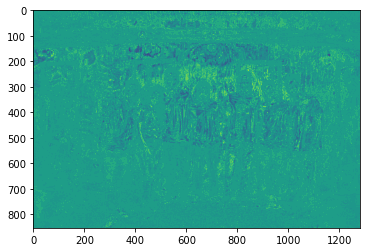

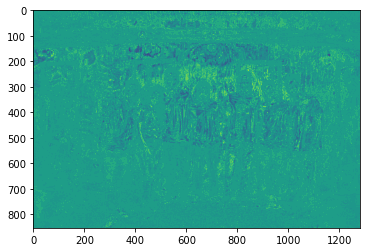

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


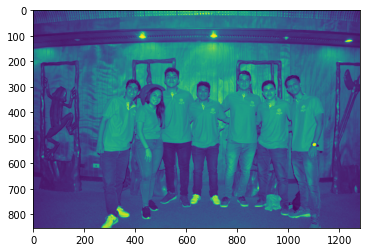

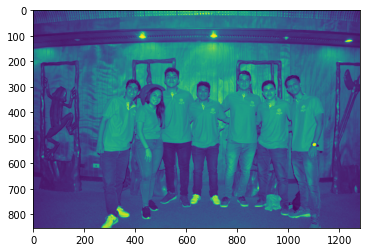

[[0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]


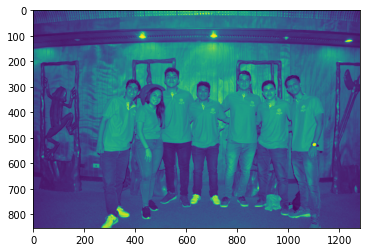

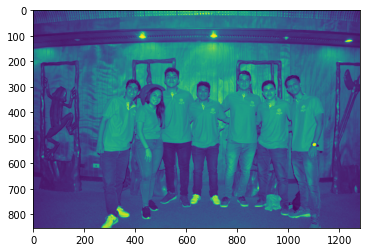

SEGUNDO
[[ 1.  1.  0.]
 [ 1.  0. -1.]
 [ 0. -1. -1.]]


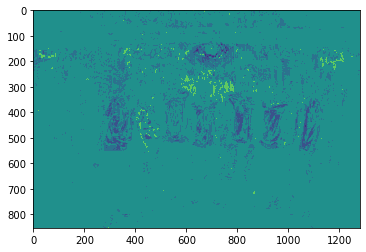

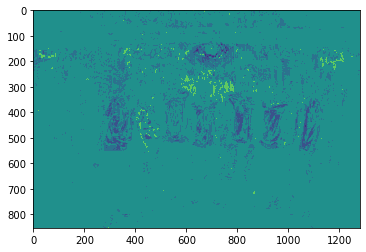

[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]


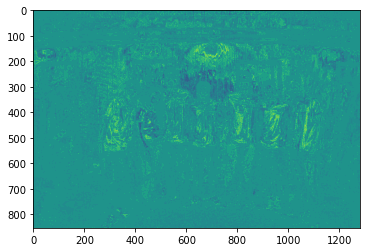

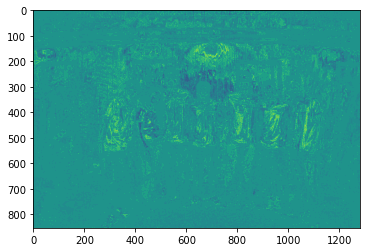

[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]


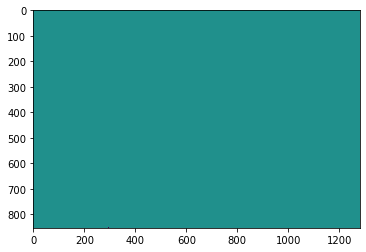

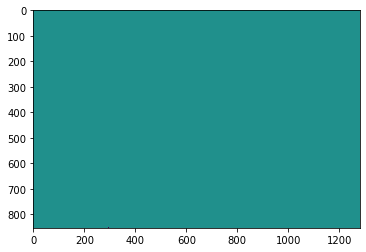

TERCERO
[[ 0.  1.  1.]
 [-1.  0.  1.]
 [-1. -1.  0.]]


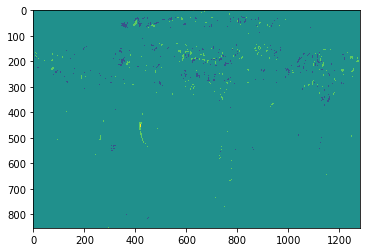

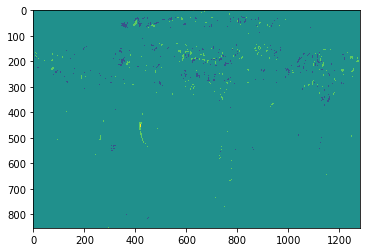

[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]


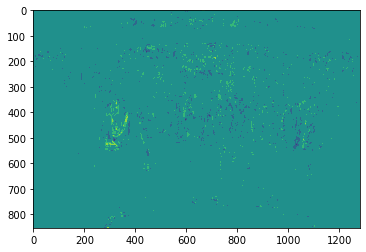

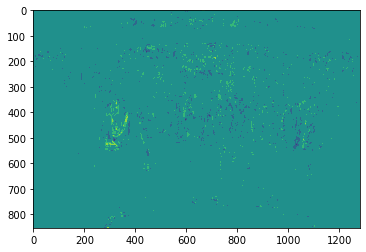

[[ 1.  2.  1.]
 [ 0.  0.  0.]
 [-1. -2. -1.]]


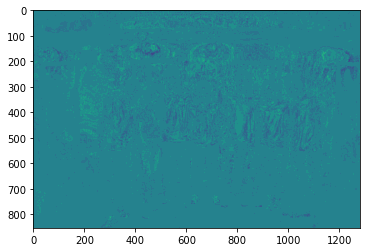

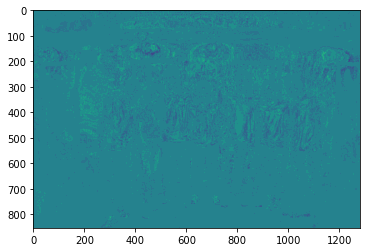

In [109]:
#se llaman las funciones
print("PRIMERO")
conv3d(kernel_diag , data1)
conv3d(kernel_hori , data1)
conv3d(kernel_vert, data1)

print("SEGUNDO")

conv3d(kernel_diag2 , data1)
conv3d(kernel_hori2 , data1)
conv3d(kernel_vert2, data1)

print("TERCERO")

conv3d(kernel_diag3 , data1)
conv3d(kernel_hori3 , data1)
conv3d(kernel_vert3, data1)

PUNTO 3

In [76]:
from matplotlib import image
#from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io


In [77]:
# Escriba un programa para cuantizar la senal v con amplitudes a=1 y a= 1/2, usando
#las longitudes de palabra o numero de bits b=4 y b=8.
def my_quantization(A, x, b):
    maxAmplitud = A
    minAmplitud = -A
    
    pasoCuantizacion = (maxAmplitud-minAmplitud)/(2**b)
    
    señal_decod_Q = np.round(x/pasoCuantizacion) #Codificacion
    x_q = señal_decod_Q*pasoCuantizacion #Decodificacion
    Delta = pasoCuantizacion
    
    return x_q, Delta

A = 1 y B = 4

In [115]:
A = 1
n = np.arange(0,8000,1)
x = A*np.sin(2*np.pi*n/8000)
b = 4

cuantizacion = my_quantization(A, x, b)
señalCuantizada = cuantizacion[0]

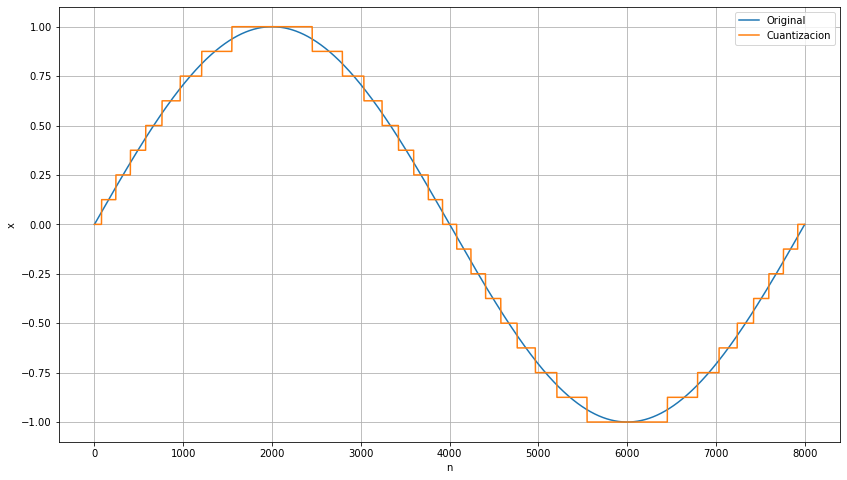

In [79]:
plt.figure(figsize = (14,8))
plt.plot(n,x, label = "Original")
plt.plot(n,señalCuantizada, label = "Cuantizacion")
plt.grid()
plt.xlabel('n')
plt.ylabel('x')
plt.legend()
plt.show()

Vector Error Cuantizacion:
 [ 0.          0.0007854   0.0015708  ... -0.00235619 -0.0015708
 -0.0007854 ]
Media:  4.440892098500626e-19
Varianza:  0.0011931122466069884


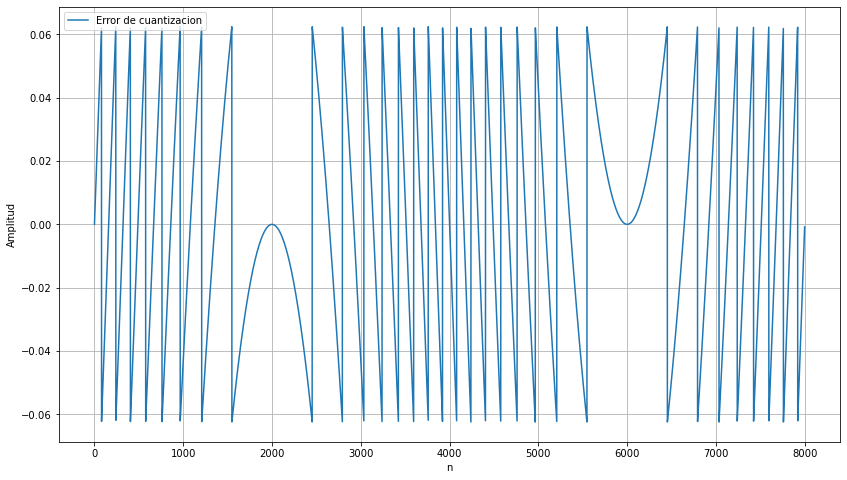

In [80]:
#error de cuantizacion, pto 2a
errorCuantizacion = x - señalCuantizada

print("Vector Error Cuantizacion:\n", errorCuantizacion) # calclar media y var
print("Media: ", np.mean(errorCuantizacion) )
print("Varianza: ", np.var(errorCuantizacion) )

#error de cuantizacion, plot 2a
plt.figure(figsize = (14,8))
plt.plot(n,errorCuantizacion, label = "Error de cuantizacion")
plt.grid()
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

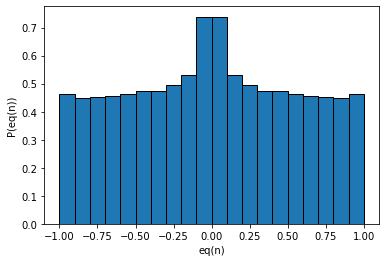

In [81]:
maximo = errorCuantizacion.max()
errorCuantizacion_prob = errorCuantizacion/maximo

#Densidad de probabilidad
barras = 20
#plt.grid()
plt.hist(errorCuantizacion_prob,barras,density=True, edgecolor='black')

plt.xlabel('eq(n)')
plt.ylabel('P(eq(n))')
plt.show()

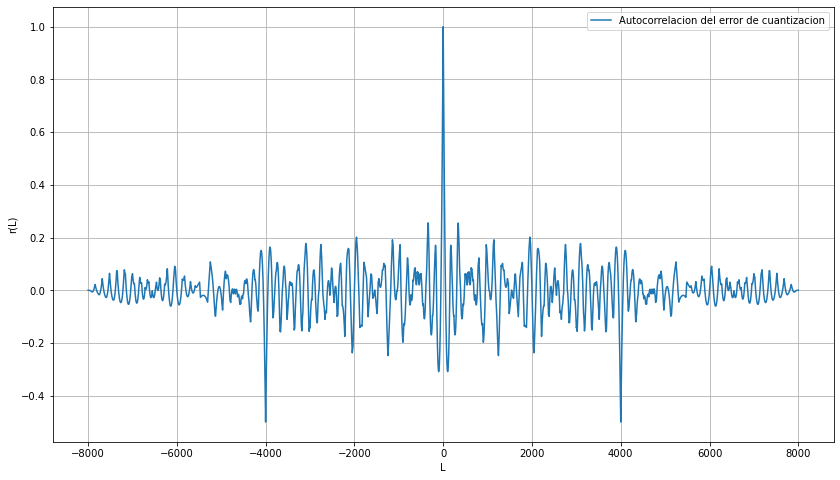

In [82]:
L = np.arange(-8000,7999,1)
autocorrelacionError = np.correlate(errorCuantizacion, errorCuantizacion, mode="full")

autocorrelacionError_max = autocorrelacionError.max() #maximo es la autocorrelacion en L=0

normalizacionAutocorrelacionError = autocorrelacionError/autocorrelacionError_max #Normalizacion

plt.figure(figsize = (14,8))
plt.plot(L,normalizacionAutocorrelacionError, label = "Autocorrelacion del error de cuantizacion")
plt.grid()
plt.xlabel('L')
plt.ylabel('r(L)')
plt.legend()
plt.show()


A = 1 y B = 8

In [83]:
A = 1
n = np.arange(0,8000,1)
x = A*np.sin(2*np.pi*n/8000)
b = 8

cuantizacion = my_quantization(A, x, b)
señalCuantizada = cuantizacion[0]

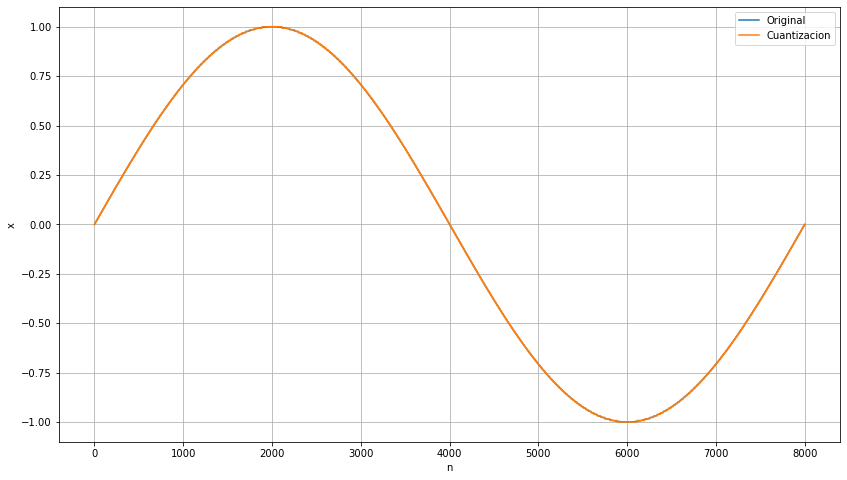

In [84]:
plt.figure(figsize = (14,8))
plt.plot(n,x, label = "Original")
plt.plot(n,señalCuantizada, label = "Cuantizacion")
plt.grid()
plt.xlabel('n')
plt.ylabel('x')
plt.legend()
plt.show()

Vector Error Cuantizacion:
 [ 0.          0.0007854   0.0015708  ... -0.00235619 -0.0015708
 -0.0007854 ]
Media:  5.724587470723464e-19
Varianza:  4.980506298615588e-06


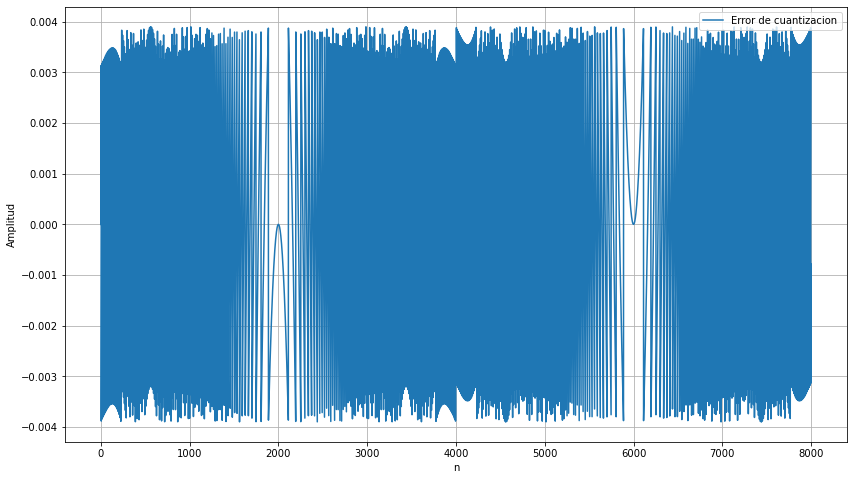

In [85]:
#error de cuantizacion, pto 2a
errorCuantizacion = x - señalCuantizada

print("Vector Error Cuantizacion:\n", errorCuantizacion) # calclar media y var
print("Media: ", np.mean(errorCuantizacion) )
print("Varianza: ", np.var(errorCuantizacion) )

#error de cuantizacion, plot 2a
plt.figure(figsize = (14,8))
plt.plot(n,errorCuantizacion, label = "Error de cuantizacion")
plt.grid()
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

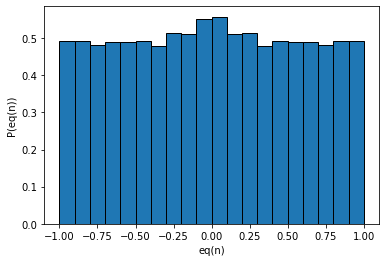

In [86]:
maximo = errorCuantizacion.max()
errorCuantizacion_prob = errorCuantizacion/maximo

#Densidad de probabilidad
barras = 20
#plt.grid()
plt.hist(errorCuantizacion_prob,barras,density=True, edgecolor='black')

plt.xlabel('eq(n)')
plt.ylabel('P(eq(n))')
plt.show()

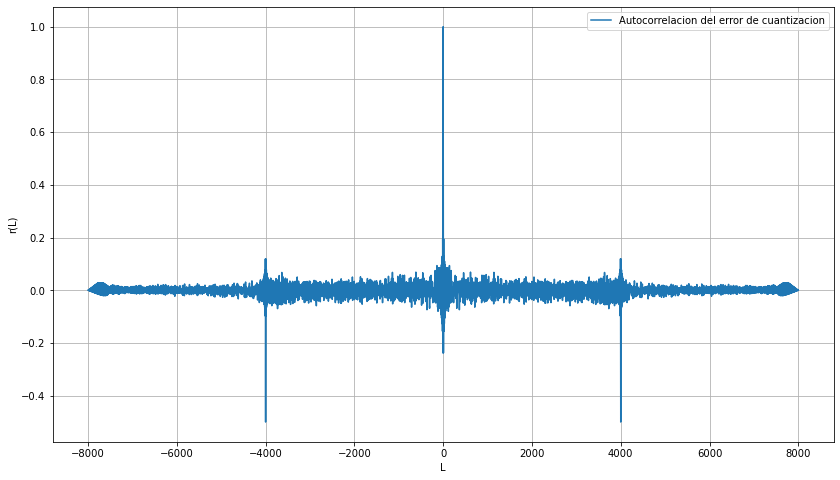

In [87]:
L = np.arange(-8000,7999,1)
autocorrelacionError = np.correlate(errorCuantizacion, errorCuantizacion, mode="full")

autocorrelacionError_max = autocorrelacionError.max() #maximo es la autocorrelacion en L=0

normalizacionAutocorrelacionError = autocorrelacionError/autocorrelacionError_max #Normalizacion

plt.figure(figsize = (14,8))
plt.plot(L,normalizacionAutocorrelacionError, label = "Autocorrelacion del error de cuantizacion")
plt.grid()
plt.xlabel('L')
plt.ylabel('r(L)')
plt.legend()
plt.show()

A = 1/2 y B = 4

In [88]:
A = 1/2
n = np.arange(0,8000,1)
x = A*np.sin(2*np.pi*n/8000)
b = 4

cuantizacion = my_quantization(A, x, b)
señalCuantizada = cuantizacion[0]

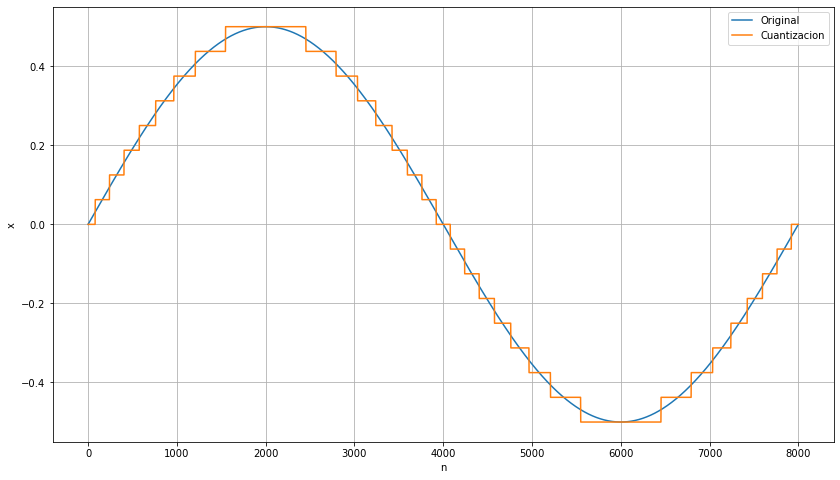

In [89]:
plt.figure(figsize = (14,8))
plt.plot(n,x, label = "Original")
plt.plot(n,señalCuantizada, label = "Cuantizacion")
plt.grid()
plt.xlabel('n')
plt.ylabel('x')
plt.legend()
plt.show()

Vector Error Cuantizacion:
 [ 0.         0.0003927  0.0007854 ... -0.0011781 -0.0007854 -0.0003927]
Media:  2.220446049250313e-19
Varianza:  0.0002982780616517471


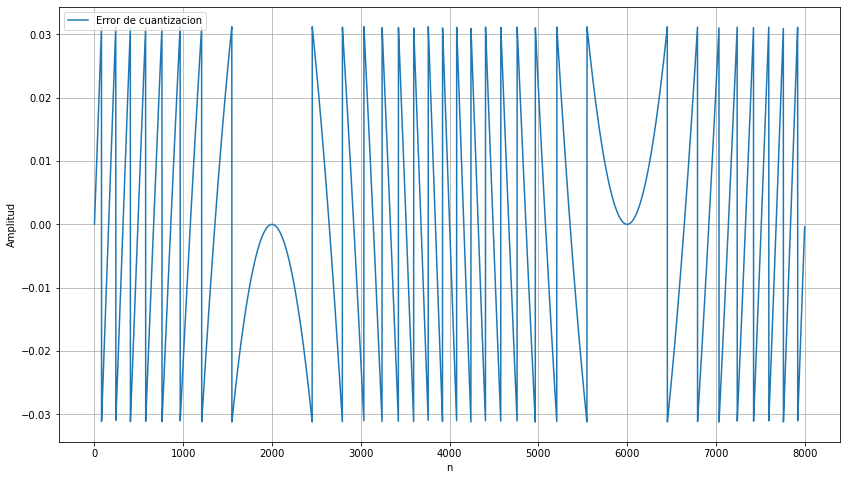

In [90]:
#error de cuantizacion, pto 2a
errorCuantizacion = x - señalCuantizada

print("Vector Error Cuantizacion:\n", errorCuantizacion) # calclar media y var
print("Media: ", np.mean(errorCuantizacion) )
print("Varianza: ", np.var(errorCuantizacion) )

#error de cuantizacion, plot 2a
plt.figure(figsize = (14,8))
plt.plot(n,errorCuantizacion, label = "Error de cuantizacion")
plt.grid()
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

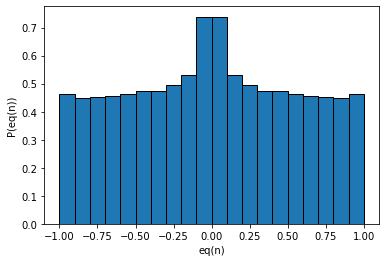

In [91]:
maximo = errorCuantizacion.max()
errorCuantizacion_prob = errorCuantizacion/maximo

#Densidad de probabilidad
barras = 20
#plt.grid()
plt.hist(errorCuantizacion_prob,barras,density=True, edgecolor='black')

plt.xlabel('eq(n)')
plt.ylabel('P(eq(n))')
plt.show()

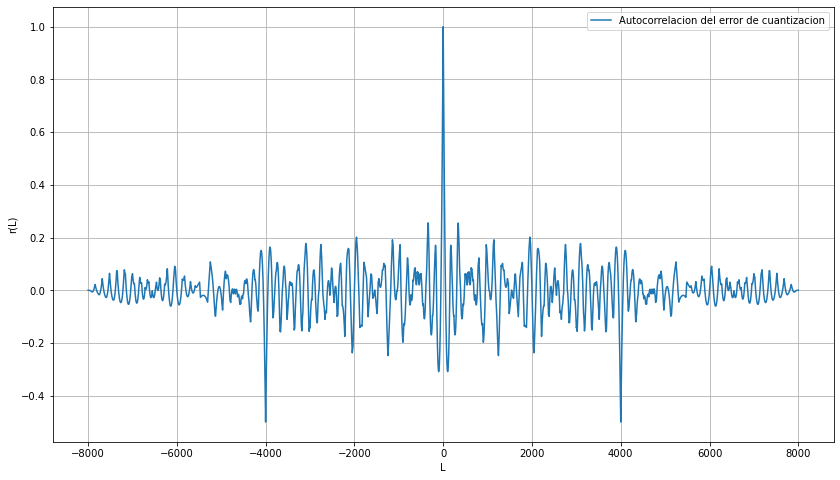

In [92]:
L = np.arange(-8000,7999,1)
autocorrelacionError = np.correlate(errorCuantizacion, errorCuantizacion, mode="full")

autocorrelacionError_max = autocorrelacionError.max() #maximo es la autocorrelacion en L=0

normalizacionAutocorrelacionError = autocorrelacionError/autocorrelacionError_max #Normalizacion

plt.figure(figsize = (14,8))
plt.plot(L,normalizacionAutocorrelacionError, label = "Autocorrelacion del error de cuantizacion")
plt.grid()
plt.xlabel('L')
plt.ylabel('r(L)')
plt.legend()
plt.show()

A = 1/2 y B = 8

In [93]:
A = 1/2
n = np.arange(0,8000,1)
x = A*np.sin(2*np.pi*n/8000)
b = 8

cuantizacion = my_quantization(A, x, b)
señalCuantizada = cuantizacion[0]

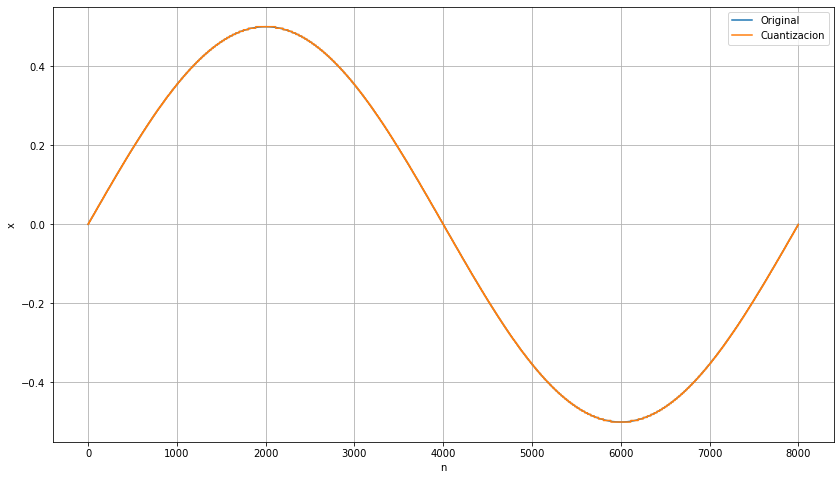

In [94]:
plt.figure(figsize = (14,8))
plt.plot(n,x, label = "Original")
plt.plot(n,señalCuantizada, label = "Cuantizacion")
plt.grid()
plt.xlabel('n')
plt.ylabel('x')
plt.legend()
plt.show()

Vector Error Cuantizacion:
 [ 0.         0.0003927  0.0007854 ... -0.0011781 -0.0007854 -0.0003927]
Media:  2.862293735361732e-19
Varianza:  1.245126574653897e-06


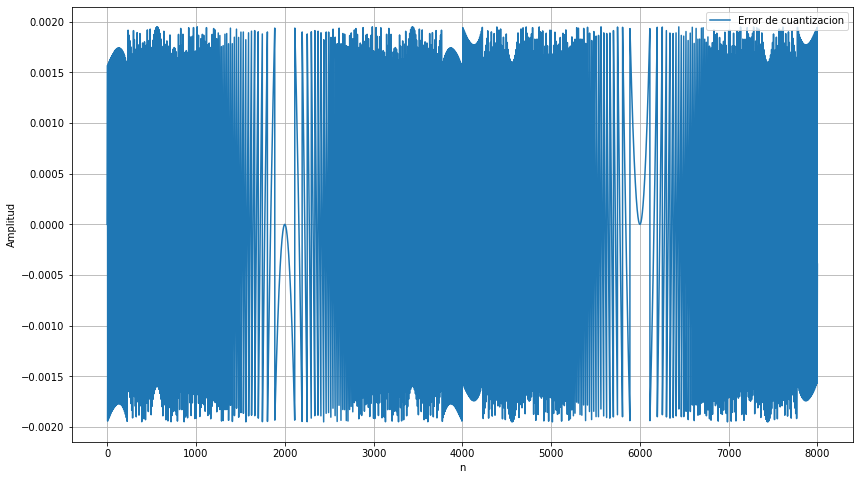

In [95]:
#error de cuantizacion, pto 2a
errorCuantizacion = x - señalCuantizada

print("Vector Error Cuantizacion:\n", errorCuantizacion) # calclar media y var
print("Media: ", np.mean(errorCuantizacion) )
print("Varianza: ", np.var(errorCuantizacion) )

#error de cuantizacion, plot 2a
plt.figure(figsize = (14,8))
plt.plot(n,errorCuantizacion, label = "Error de cuantizacion")
plt.grid()
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

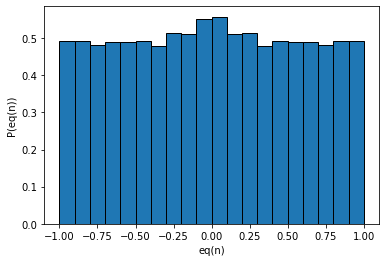

In [96]:
maximo = errorCuantizacion.max()
errorCuantizacion_prob = errorCuantizacion/maximo

#Densidad de probabilidad
barras = 20
#plt.grid()
plt.hist(errorCuantizacion_prob,barras,density=True, edgecolor='black')

plt.xlabel('eq(n)')
plt.ylabel('P(eq(n))')
plt.show()

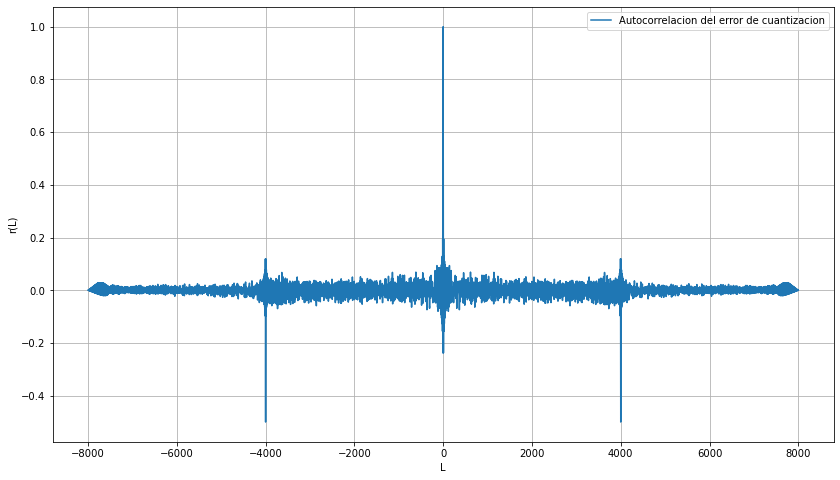

In [97]:
L = np.arange(-8000,7999,1)
autocorrelacionError = np.correlate(errorCuantizacion, errorCuantizacion, mode="full")

autocorrelacionError_max = autocorrelacionError.max() #maximo es la autocorrelacion en L=0

normalizacionAutocorrelacionError = autocorrelacionError/autocorrelacionError_max #Normalizacion

plt.figure(figsize = (14,8))
plt.plot(L,normalizacionAutocorrelacionError, label = "Autocorrelacion del error de cuantizacion")
plt.grid()
plt.xlabel('L')
plt.ylabel('r(L)')
plt.legend()
plt.show()